Python Project - Marvel Mart Project   
Jurgena Kerrci   
03/14/2021

In [724]:
# Importing libraries, data and setting the formats 
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import seaborn as sns
sns.set(style="ticks", palette="Set2")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Importing the data
MMsales = pd.read_csv("Project/MM_Sales.csv", delimiter =',')

# Part 1: Cleaning the data

In [725]:
# Creating a clean copy of the data
MMsalesClean = MMsales

In [727]:
# It first looks the shape of the data frame so it can see the number of 
# columns and rows. Then, it looks for missing data. 
# It also tells us the exact number of missing items for each column
print(MMsalesClean.shape)
print(MMsalesClean.count())
print(MMsalesClean.count()-MMsalesClean.shape[0])

(50000, 14)
Region            50000
Country           50000
Item Type         49994
Sales Channel     50000
Order Priority    49985
Order Date        50000
Order ID          50000
Ship Date         50000
Units Sold        50000
Unit Price        50000
Unit Cost         50000
Total Revenue     50000
Total Cost        50000
Total Profit      50000
dtype: int64
Region             0
Country            0
Item Type         -6
Sales Channel      0
Order Priority   -15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64


In [728]:
# Cleaning the Country column. There were 3 elements that were floats.
count = 0

for index, row in MMsalesClean.iterrows():
    try:
        # try to convert each sex to float, is it succedes, it's bad
        row.loc["Country"]= float(row.loc["Country"])
        MMsalesClean.loc[int(index), "Country"] = "NULL"
        print(MMsalesClean.loc[int(index),"Country"])
        count+=1
    except:
          1==1
    
print(F"Number of erronous Countries data {count}")

NULL
NULL
NULL
Number of erronous Countries data 3


In [729]:
# Cleaning Item Type column. We have six missing data that they are filled with NULL
MMsalesClean['Item Type'] = MMsalesClean['Item Type'].fillna("NULL")

In [730]:
# Cleaning Order Priority column. We have fifteen missing data that they are filled with NULL
MMsalesClean['Order Priority'] = MMsalesClean['Order Priority'].fillna("NULL")

In [731]:
# Using Group by function to check for any outsiders in the Order ID colum 
# There are five rows that have an item that is incorrect: Cosmetics,Fruits,Meat,Snacks(2)
MMsalesClean.groupby(["Order ID"]).count()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,,,,,,,,,,,,,
100013196,1,1,1,1,1,1,1,1,1,1,1,1,1
100023066,1,1,1,1,1,1,1,1,1,1,1,1,1
100061261,1,1,1,1,1,1,1,1,1,1,1,1,1
100071990,1,1,1,1,1,1,1,1,1,1,1,1,1
100074136,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999999463,1,1,1,1,1,1,1,1,1,1,1,1,1
Cosmetics,1,1,1,1,1,1,1,1,1,1,1,1,1
Fruits,1,1,1,1,1,1,1,1,1,1,1,1,1


In [732]:
# Cleaning Order ID column by replacing incorrect cell values with NULL
MMsalesClean['Order ID'] = MMsalesClean['Order ID'].replace("Meat","NULL")
MMsalesClean['Order ID'] = MMsalesClean['Order ID'].replace("Snacks","NULL")
MMsalesClean['Order ID'] = MMsalesClean['Order ID'].replace("Fruits","NULL")
MMsalesClean['Order ID'] = MMsalesClean['Order ID'].replace("Cosmetics","NULL")

In [733]:
# It removes all the rows that have been alterated
MMsalesClean = MMsalesClean[MMsalesClean["Item Type"] != "NULL"]
MMsalesClean = MMsalesClean[MMsalesClean["Order Priority"] != "NULL"]
MMsalesClean = MMsalesClean[MMsalesClean["Country"] != "NULL"]
MMsalesClean = MMsalesClean[MMsalesClean["Order ID"] != "NULL"]

In [734]:
# It tests to see if the items selected have been removed and if there is any incorrect data left
print(MMsalesClean["Item Type"][MMsalesClean["Item Type"] == "NULL"].count())
print(MMsalesClean["Order Priority"][MMsalesClean["Order Priority"] == "NULL"].count())
print(MMsalesClean["Country"][MMsalesClean["Country"] == "NULL"].count())
print(MMsalesClean["Order ID"][MMsalesClean["Order ID"] == "NULL"].count())

0
0
0
0


In [735]:
# Rewriting the CSV file calling it MM_Sales_Clean, and defining it with a new name
MMsalesClean.to_csv("Project/MM_Sales_Clean.csv", index=False)
newMM = pd.read_csv("Project/MM_Sales_Clean.csv")

# Double cheking for any missing data
print(newMM.shape)
print(newMM.count())

(49971, 14)
Region            49971
Country           49971
Item Type         49971
Sales Channel     49971
Order Priority    49971
Order Date        49971
Order ID          49971
Ship Date         49971
Units Sold        49971
Unit Price        49971
Unit Cost         49971
Total Revenue     49971
Total Cost        49971
Total Profit      49971
dtype: int64


# Part 2: Exploratory Data Analysis with Reports & Visualizations

Question 1

In [736]:
# They want to know which are the top ten countries that sell the most
SalesTransCount = (newMM["Country"].value_counts().head(n=10))
print(SalesTransCount)

# It writes the result to a file.text named MM_Rankings.text
MostSell = ("Countries Most Sale Transactions:\nTrinidad and Tobago: 321\nGuinea: 318\nCape Verde: 315\nMaldives: 311\nFinland: 310\nDemocratic Republic of the Congo: 308\nSamoa: 306\nMalta: 305\nChina: 303\nSouth Sudan: 302")   
AnswerQuestion = ("\n\nThe country we should build our shipping center is Cape Verde.\nSince we already have shipping centers in Trinidad and Tobago, Guinea, and Maldives, \nCape Verde is the next top country with most transactions. ")                                    
with open("Project/MM_Rankings.txt", "a+") as reader:
    reader.writelines("Question 1:\n\n")
    reader.writelines(MostSell)
    reader.writelines(AnswerQuestion)
with open("Project/MM_Rankings.txt", "r") as reader:
    for line in reader:
        print(line, end = '')

Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          314
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
South Sudan                         302
Name: Country, dtype: int64
Question 1:

Countries Most Sale Transactions:
Trinidad and Tobago: 321
Guinea: 318
Cape Verde: 315
Maldives: 311
Finland: 310
Democratic Republic of the Congo: 308
Samoa: 306
Malta: 305
China: 303
South Sudan: 302

The country we should build our shipping center is Cape Verde.
Since we already have shipping centers in Trinidad and Tobago, Guinea, and Maldives, 
Cape Verde is the next top country with most transactions. 

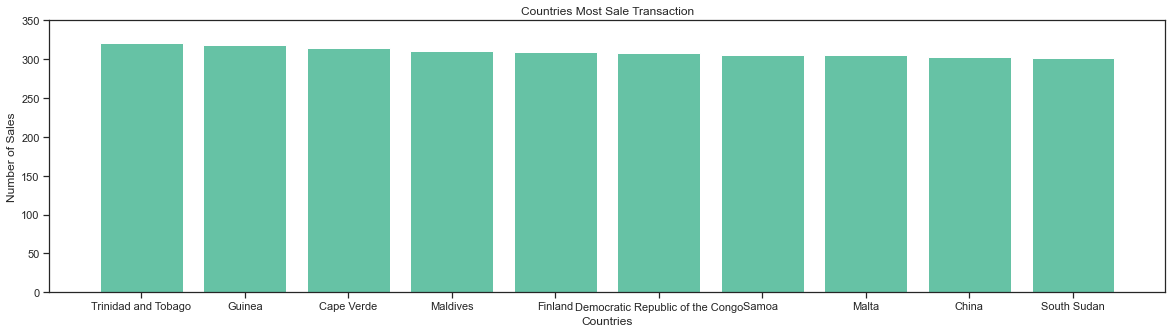

In [737]:
# It creates a bar graph to show the top 10 values by country
# Sets the figure size
plt.figure(figsize=(20,5))
plt.ylim(0, 350)

# Sets the variable where: index is x and values is y
# It prints the bar graph
plt.bar(Top10.index, Top10.values)
plt.title('Countries Most Sale Transaction')
plt.xlabel('Countries')
plt.ylabel('Number of Sales')
plt.show()

Question 2

In [738]:
# They want to know how many online/offline orders they take
# It uses this function to count the number of online/offline orders
countChannel = newMM["Sales Channel"].value_counts()  
print(countChannel)      

resultChannel = ("Online:     30183\nOffline:    19788")
resulChannelanswer = (f"\nWe take more online orders.\n\n")

Online     30183
Offline    19788
Name: Sales Channel, dtype: int64


In [739]:
# It writs the answer for Sales Channel in the text file called MM_Rankings.txt:       
with open ("Project/MM_Rankings.txt", "a+") as reader:
    reader.writelines("\n\nQuestion 2:\n")
    reader.writelines("\n\nSales Channels:\n")
    reader.writelines(resultChannel)
    reader.writelines(resulChannelanswer)
with open ("Project/MM_Rankings.txt", "r") as reader:
    for line in reader:
        print(line, end = '')

Question 1:

Countries Most Sale Transactions:
Trinidad and Tobago: 321
Guinea: 318
Cape Verde: 315
Maldives: 311
Finland: 310
Democratic Republic of the Congo: 308
Samoa: 306
Malta: 305
China: 303
South Sudan: 302

The country we should build our shipping center is Cape Verde.
Since we already have shipping centers in Trinidad and Tobago, Guinea, and Maldives, 
Cape Verde is the next top country with most transactions. 

Question 2:


Sales Channels:
Online:     30183
Offline:    19788
We take more online orders.



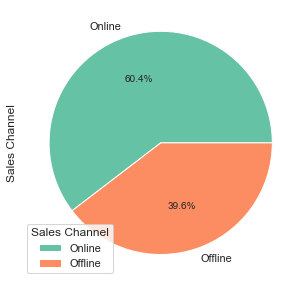

In [740]:
# It creats a pie chart with Sales Channel data
plt.figure(figsize=(5, 5))
plt.axis('equal')
newMM["Sales Channel"].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(loc=3, title='Sales Channel')

In [741]:
# They want to know which order priority they do more
# It uses this function to count the number of the different order priority
countOrderPriority = newMM["Order Priority"].value_counts()  
print(countOrderPriority)

resultOrderPriority = ("M:    19881\nH:    15094\nL:    9984\nC:    5012")
resultOrderPriorityanswer = (f"\nWe do more M order priorities.\n\n")

M    19881
H    15094
L     9984
C     5012
Name: Order Priority, dtype: int64


In [742]:
# It writs the answer for Order Priority in the text file called MM_Rankings.txt: 
with open ("Project/MM_Rankings.txt", "a+") as reader:
    reader.writelines("Order Priority:\n")
    reader.writelines(resultOrderPriority)
    reader.writelines(resultOrderPriorityanswer)
with open ("Project/MM_Rankings.txt", "r") as reader:
    for line in reader:
        print(line, end = '')

Question 1:

Countries Most Sale Transactions:
Trinidad and Tobago: 321
Guinea: 318
Cape Verde: 315
Maldives: 311
Finland: 310
Democratic Republic of the Congo: 308
Samoa: 306
Malta: 305
China: 303
South Sudan: 302

The country we should build our shipping center is Cape Verde.
Since we already have shipping centers in Trinidad and Tobago, Guinea, and Maldives, 
Cape Verde is the next top country with most transactions. 

Question 2:


Sales Channels:
Online:     30183
Offline:    19788
We take more online orders.

Order Priority:
M:    19881
H:    15094
L:    9984
C:    5012
We do more M order priorities.



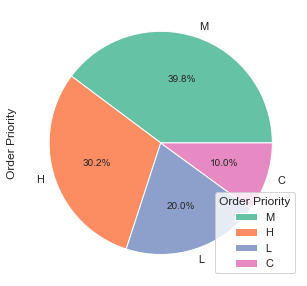

In [743]:
# It creats a pie chart with Order Priority data
plt.figure(figsize=(5, 5))
plt.axis('equal')
newMM["Order Priority"].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(loc=4, title='Order Priority')

Question 3

In [744]:
# It uses the sum function to determin the sum of Total Profit by Item Type
pd.options.display.float_format = '{:.2f}'.format
sumTotProfit= newMM.groupby(["Item Type"]).sum()
TotProfitbyItemType = sumTotProfit["Total Profit"]
print(TotProfitbyItemType)

Item Type
Baby Food         1942865748.12
Beverages          327559249.08
Cereal            1824726412.29
Clothes           1520832019.68
Cosmetics         3638407966.75
Fruits              51010570.92
Household         3401180998.06
Meat              1196342404.40
Office Supplies   2605440187.50
Personal Care      535250525.60
Snacks            1149715758.72
Vegetables        1322639660.24
Name: Total Profit, dtype: float64


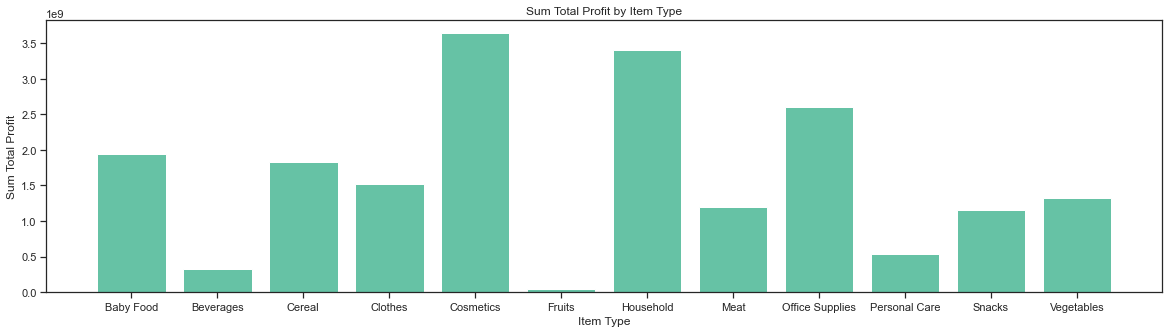

In [745]:
# It uses the bar graph to show the sum of the different Item Types
plt.figure(figsize=(20, 5))

plt.bar(TotProfitbyItemType.index, TotProfitbyItemType.values)
plt.title("Sum Total Profit by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Sum Total Profit")
plt.show()

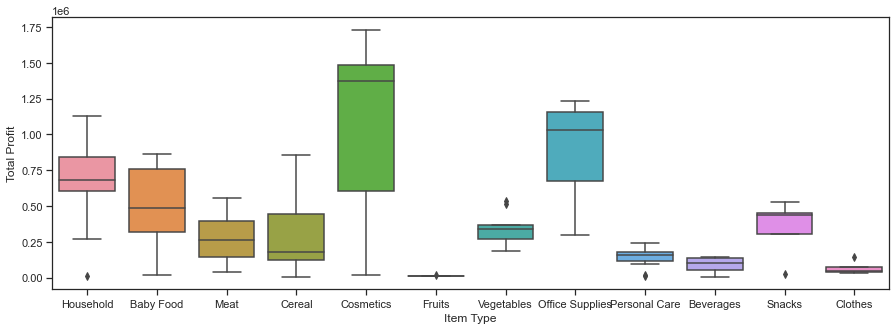

In [746]:
# It creats a boxplot to show the Total Profits distribution by Item Type
plt.figure(figsize=(15,5))
ax = sns.boxplot(newMM["Item Type"], newMM["Total Profit"][0:100])

A boxplot is a graph that gives indication of how the values in the data are spread out and identifies outliers. When the median is in the middle of the box, and the whiskers are about the same on both sides of the box, then the distribution is symmetric. We can see this in the Meat and Beverages boxs. When the median is closer to the bottom of the box, and if the whisker is shorter on the lower end of the box, then the distribution is positively skewed. In fac, Household, Baby Food and Cereal boxs are positivelly skewed. In the other cases like Cosmetics, vegetable and Snaks, the distribution is negatively skewed. We also identify cosmetics as an outlier and the one with a higher distribution.

In [747]:
# It ranks the top 3 Item Types they did most sales
df = pd.DataFrame(newMM, columns= ["Item Type", "Total Profit"])
groupbyItemsType = df.groupby("Item Type")
top3ItemsType = groupbyItemsType.sum()
sortData= top3ItemsType.sort_values("Total Profit", ascending=False)
top3ItemsType = sortData.head(3)
print(top3ItemsType)

                 Total Profit
Item Type                    
Cosmetics       3638407966.75
Household       3401180998.06
Office Supplies 2605440187.50


In [748]:
# It writes the result in the text_file named MM_Rankings.txt
with open("Project/MM_Rankings.txt", "a+") as reader:
    reader.writelines("\n\nQuestion 3 :\n\n")
    reader.writelines(f"Highest Selling Items:\nCosmetics       3638407966.750\nHousehold       3401180998.060\nOffice Supplies 2605440187.500")
    reader.writelines("\nWe profited from cosmetics the most.")
with open("Project/MM_Rankings.txt", "r") as reader:
    for line in reader:
        print(line, end = '')

Question 1:

Countries Most Sale Transactions:
Trinidad and Tobago: 321
Guinea: 318
Cape Verde: 315
Maldives: 311
Finland: 310
Democratic Republic of the Congo: 308
Samoa: 306
Malta: 305
China: 303
South Sudan: 302

The country we should build our shipping center is Cape Verde.
Since we already have shipping centers in Trinidad and Tobago, Guinea, and Maldives, 
Cape Verde is the next top country with most transactions. 

Question 2:


Sales Channels:
Online:     30183
Offline:    19788
We take more online orders.

Order Priority:
M:    19881
H:    15094
L:    9984
C:    5012
We do more M order priorities.



Question 3 :

Highest Selling Items:
Cosmetics       3638407966.750
Household       3401180998.060
Office Supplies 2605440187.500
We profited from cosmetics the most.

Question 4

In [749]:
# It creates a new dataframe with the needed data
newMM2 = pd.read_csv("Project/MM_Sales_Clean.csv", sep=',')
newMM2= pd.DataFrame(newMM, columns = ['Units Sold', 'Unit Cost',"Total Revenue", "Total Cost", "Total Profit"]) 

In [750]:
# It calculates the sums,avarages and max of the selected columns
Sum = newMM2.sum()
Avg = newMM2.mean()
Max = newMM2.max()

print(Sum)
print("\n")
print(Avg)
print("\n")
print(Max)

Units Sold        249818150.00
Unit Cost           9360768.32
Total Revenue   66145004417.17
Total Cost      46629032915.81
Total Profit    19515971501.36
dtype: float64


Units Sold         4999.26
Unit Cost           187.32
Total Revenue   1323667.82
Total Cost       933121.87
Total Profit     390545.95
dtype: float64


Units Sold        10000.00
Unit Cost           524.96
Total Revenue   6682031.73
Total Cost      5249075.04
Total Profit    1738178.39
dtype: float64


In [751]:
# It writes the result to a file.text named as MM_Calc.text
results1 = (f"Sums:\n{Sum}\n")
results2 = (f"Averages:\n{Avg}\n")
results3 = (f"Maximums:\n{Max}\n")

with open("Project/MM_Calc.txt", "a+") as reader:
    reader.writelines("Question 4.:\n\n")
    reader.writelines(results1)
    reader.writelines("\n\n")
    reader.writelines(results2)
    reader.writelines("\n\n")
    reader.writelines(results3)
with open("Project/MM_Calc.txt", "r") as reader:
    for i in reader:
        print(i, end = '')

Question 4.:

Sums:
Units Sold        249818150.00
Unit Cost           9360768.32
Total Revenue   66145004417.17
Total Cost      46629032915.81
Total Profit    19515971501.36
dtype: float64


Averages:
Units Sold         4999.26
Unit Cost           187.32
Total Revenue   1323667.82
Total Cost       933121.87
Total Profit     390545.95
dtype: float64


Maximums:
Units Sold        10000.00
Unit Cost           524.96
Total Revenue   6682031.73
Total Cost      5249075.04
Total Profit    1738178.39
dtype: float64


Text(0, 0.5, 'Range')

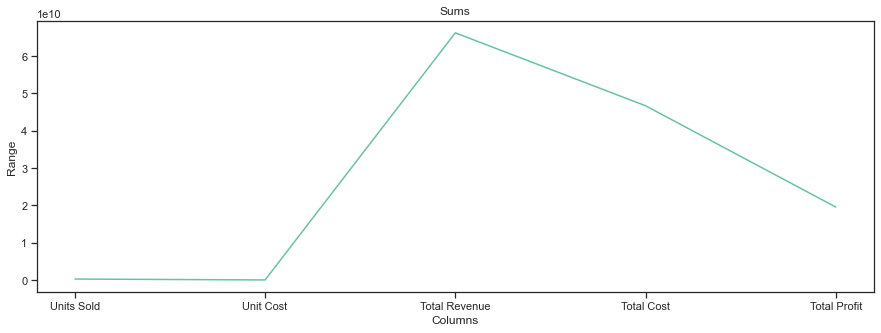

In [752]:
# It creats a line plot for sums
plt.figure(figsize=(15, 5))
plt.plot(Sum)
plt.title('Sums')
plt.xlabel("Columns")
plt.ylabel("Range")

Text(0, 0.5, 'Range')

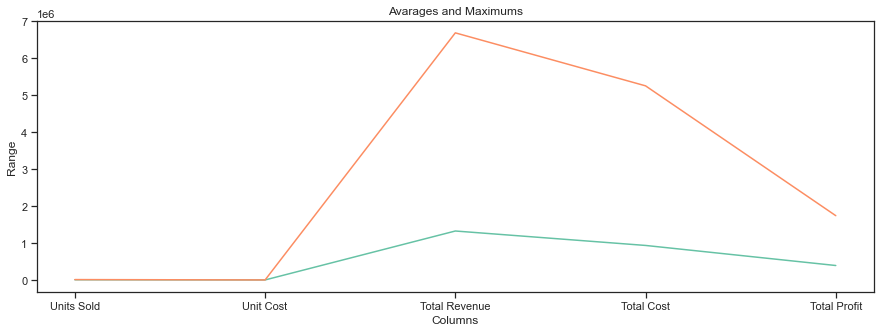

In [753]:
# It creats a two line plot for avarages and maximums
plt.figure(figsize=(15, 5))
plt.plot(Avg)
plt.plot(Max)
plt.title('Avarages and Maximums')
plt.xlabel("Columns")
plt.ylabel("Range")

# Part 3: Cross-Reference Statistics

In [754]:
# First open the clean data. It creats a new dictionary and appends the countries with 
# the appropriate regions
with open("Project/MM_Sales_Clean.csv", "r") as csv_file:
    reader = csv.DictReader(csv_file)
   
    regionlist = {}
    for row in reader:
        if row["Region"] not in regionlist.keys():
            regionlist[row["Region"]] = []
        if row["Country"] not in regionlist.values():
            if row["Country"] not in regionlist[row["Region"]]:
                regionlist[row["Region"]].append(row["Country"])

# It makes an iterator that aggregates elements from each of the iterables.
from itertools import zip_longest
newRegionList = list(zip_longest(*regionlist.values()))

# It writs the data the csv_file named Countries_By_Region.
with open("Project/Countries_By_Region.csv", "w+", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(regionlist.keys())
    for items in newRegionList:
          writer.writerow(items)